# Проект 'Исследование данных о компьютерных играх'

## Общая информация 

### Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

### Загрузка датасета

In [2]:
try:
    data = pd.read_csv('datasets\games.csv')
except:
    data = pd.read_csv('games.csv')

### Содержание датасета

In [3]:
# общая информация о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# первые 5 строк таблицы 
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


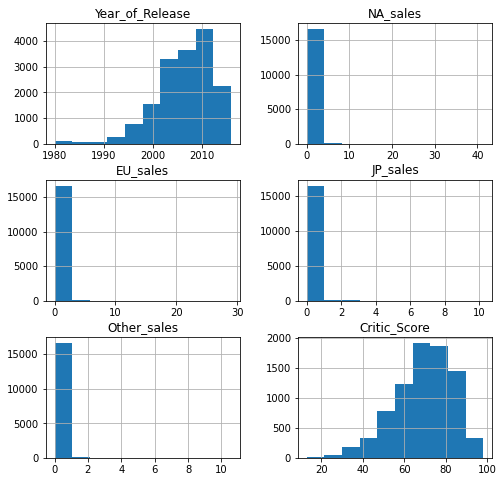

In [5]:
# гистограмма для всех числовых столбцов
data.hist(figsize=(8, 8));

### Вывод
В датасете 11 столбцов с различными характеристиками компьютерных игр. По общей гистограмме хорошо видно распредедение годов выхода и оценок критиков. Продажи в регионах мира показаны не репрезентативно, так как, видимо, имеют выбросы. Столбец с оценками пользователей вообше не отображён, потому что имеет не подходящий тип данных. С этой и другими проблемами разберёмся во время предобработки.  

## Подготовка данных (предобработка)

### Заменим названия столбцов (приведём к нижнему регистру)

In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Все стобцы датасета названы некорректно. Так что переименуем каждый, используя метод 'str.lower()':

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуем данные в нужные типы

Найдём столбцы, где тип переменной не соответствует смыслу.

In [9]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Из общей информации о датасете видно, что:
-  В столбце "year_of_release" надо поменять float на int;
-  Пользовательскую оценку надо изменить с object на float;

Попробуем изменить тип данных в приведённых столбцах.

In [10]:
try:
    data['year_of_release'] = data['year_of_release'].astype('int')
    data['user_score'] = data['user_score'].astype('float')
except:
    print('Не удалось поменять типы столбцов')

Не удалось поменять типы столбцов


Легко проверить, что мы не смогли сделать это из-за nan-ов или других , которые присутствуют в этих столбцах. Поэтому сразу перейдём к обработке аномалий и пропусков.

### Обработаем пропуски и непонятные значения 

#### Для каждого столбца определим уникальные элементы

In [11]:
columns = data.columns
for column in columns:
    if 'sales' not in column:
        display(column)
        display(data[column].unique())

'name'

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

'platform'

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

'year_of_release'

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

'genre'

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

'critic_score'

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

'user_score'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'rating'

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [12]:
# названия жанров также приведём к нижнему регистру
data['genre'] = data['genre'].str.lower()

По этим данным видно, что в 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating' присутствуют некорректные значения. 
Обратим внимание на 'user_sсore', а точнее на значение 'tbd' в нём. Эта аббревиатура означает **to be determined**, то есть так обозначается величина, значение которой предстоит определить. По смыслу это просто пропуски, не установленные пользовательские оценки. Поэтому заменим такие аномалии на 'nan'.

In [13]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
# проверим успешность замены
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Непонятное значение исчезло. Остальные аномалии разберём чуть дальше.

#### Изучим пропуски и устраним их там, где это возможно.

In [14]:
# количество пропущенных значений в каждом столбце
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

В 6 стобцах датасета имеются проуски. Пойдём по порядку:
- В стобце `name` указано название компьюетерной игры. Это категориальная переменная, поэтому заполнить пустые места средним или медианой невозможно. Но и без этого параметра нельзя обойтись потому, что только он определяет конкретную игру. Значение могло быть упущено по невнимательности или из-за отсутствия названия у игры. Пропуски всего 2, так что удаление этих строчек из датасета ни на что не повлияет.
- В годе выпуска, `year_of_release`, есть 269 пустых значений. Его либо забыли указать, либо не смогли точно определить год. Угадать такой параметр мы не можем, поэтому эти пропуски также удалим.
- Жанр игры (`genre`) возможно угадать, если разобраться в сущности игры (однако в упущенных примерах это сделать видимо не смогли). Поэтому их тоже удалим.
- `critic_score` и `user_score` очень важные для игры параметры. Зачастую по ним люди судят о качестве продукта и принимают решение о покупке. К несчастью именно в этих столбцах очень много пропущено. Видимо какие-то игры просто остались без оценки, а какие-то явлсяются слишком новыми. Правильнее всего будет отнести такие примеры к отдельной категории (отметим их значением '-1', так как для обеих оценок это невозможное значение).
- Столбец `rating` тоже содержит много nan-ов. Далеко не во всех играх легко определить возрастной рейтинг, поэтому как минимум в 6766 случаях организация ESRB не смогла это сделать. Для них также создадим отдельную категорию ('no_rate').

In [15]:
# удалим строки с пустыми значениями в столбцах 'name', 'year_of_release', 'genre'
data.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)
# заполним пропуски в 'critic_score', 'user_score' и 'rating' соответствующими значениями
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)
data['rating'] = data['rating'].fillna('no_rate')
# проверим количество пропусков после удаления
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

С пропусками мы разобрались. Теперь наконец поменяем типы в столбцах 'year_of_release' и 'user_score'.

In [16]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')

In [17]:
# выведем информацию о датасете для проверки изменений
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Типы переменных соответствуют смыслу, а пропуски устранены с минимальными потерями (<300 удаленных строк).

### Посчитаем суммарные продажи во всех регионах

Значения из столбцов 'na_sales', 'eu_sales', 'jp_sales' и 'other_sales' складываем и записываем в столбец 'world_sales'.

In [18]:
data['world_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_rate,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_rate,31.38


### Вывод
Теперь подготовка данных полностью завершена. Мы привели названия стобцов к нижнему регистру с помощью метода str.lower(). Преобразовали типы данных там, где это было необходимо. Удалили или заполнили "заглушками" пропуски, потеряв лишь 1% данных и объяснив причины упущенных значений в каждом столбце. А также создали дополнительный столбец с мировыми продажами. 
На результаты анализа больше ничего не повлияет. Можно переходить к следующему этапу.

## Исследовательский анализ данных

### Посморим, сколько игр выпускалось в разные годы

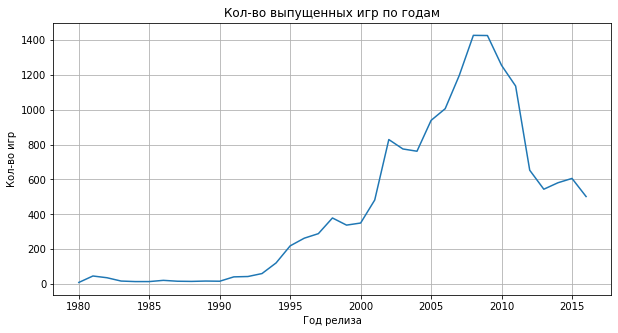

In [19]:
# сргуппируем данные по годам
games_per_year = data.pivot_table(index='year_of_release', aggfunc='count')['name']
games_per_year.plot(grid=True, figsize=(10,5), title='Кол-во выпущенных игр по годам');
plt.xlabel('Год релиза')
plt.ylabel('Кол-во игр')
plt.show()

По количеству выпущенных игр в период с 1980 по 2016 год, можно сказать, что имеет смысл сократить временные рамки. До 1995 года индустрия только начинала своё развитие, поэтому для дальнейшего анализа эти данные нам не понадобятся. Но так как наше исследование направлено на прогнозирование ситуации в 2017 году, оставим игры, вышедшие после 2010 года.

In [20]:
# сохраним данные за всё время 
data_all = data
# рассмотрим данные с 2000 по 2016 год
data = data.query('2010 <= year_of_release <= 2016')

### Рассморим как менялись продажи по платформам

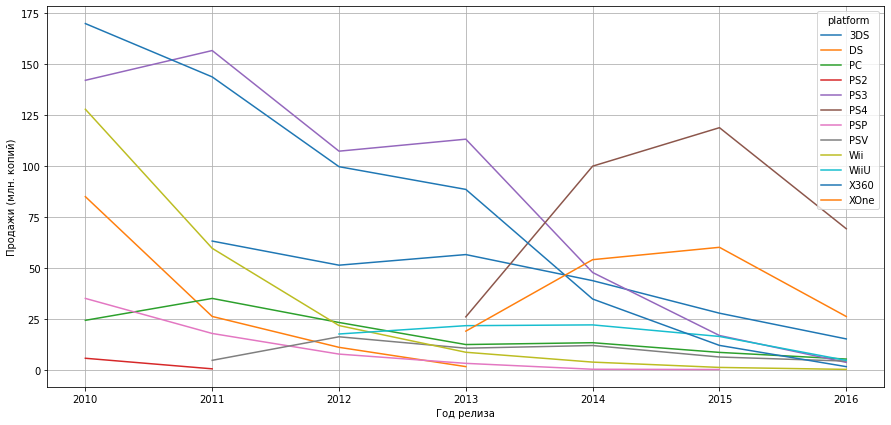

In [21]:
# сгруппируем продажи по платформам за каждый год
platform_sales_per_year = data.pivot_table(index='year_of_release', columns = 'platform', values='world_sales', aggfunc='sum')
platform_sales_per_year.plot(grid=True, figsize=(15, 7));
plt.xlabel('Год релиза')
plt.ylabel('Продажи (млн. копий)')
plt.show()

Из графика видно, что за последние 6 лет продажи всех платформ стремительно падали, а к 2016 году стали почти нулевыми. Под это описание не попадают только две платформы: PS4 и XOne.

#### Выберем платформы с наибольшими суммарными продажами

In [22]:
# покажем суммарные продажи по каждой платформе
platform_sales = data.pivot_table(index='platform', values='world_sales', aggfunc='sum')
platform_sales.sort_values(by='world_sales', ascending=False)

,world_sales
platform,
PS3,587.74
X360,550.41
PS4,314.14
3DS,257.81
Wii,222.97
XOne,159.32
DS,123.75
PC,121.96
WiiU,82.19


Топ-3 занимают PS3, X360 и PS4. Однако мы всё ещё рассматриваем довольно большой период. К 2015 году продажи первых двух стали меньше 25 млн. копий, а PS4 и XOne появились только в 2013, поэтому их суммарные продажи пока уступают старым конкурентам. 

Построим распределение по годам для PS3, X360, PS4 и XOne (2013-2016).

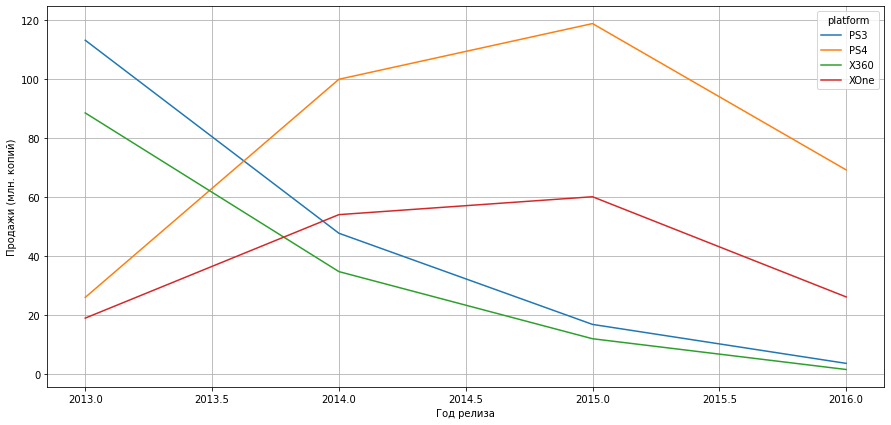

In [23]:
# сделаем срез данных
data = data.query("platform == ['PS3', 'X360', 'PS4', 'XOne'] and year_of_release >= 2013")
# сгруппруем и построим график
data.pivot_table(index='year_of_release', columns = 'platform', values='world_sales', aggfunc='sum')\
    .plot(grid=True, figsize=(15, 7));
plt.xlabel('Год релиза')
plt.ylabel('Продажи (млн. копий)')
plt.show()

По графику наглядно видно, что лидерами однозначно являются новые платформы PS4 и XOne.

#### За какой характерный срок появляются новые и исчезают старые платформы?

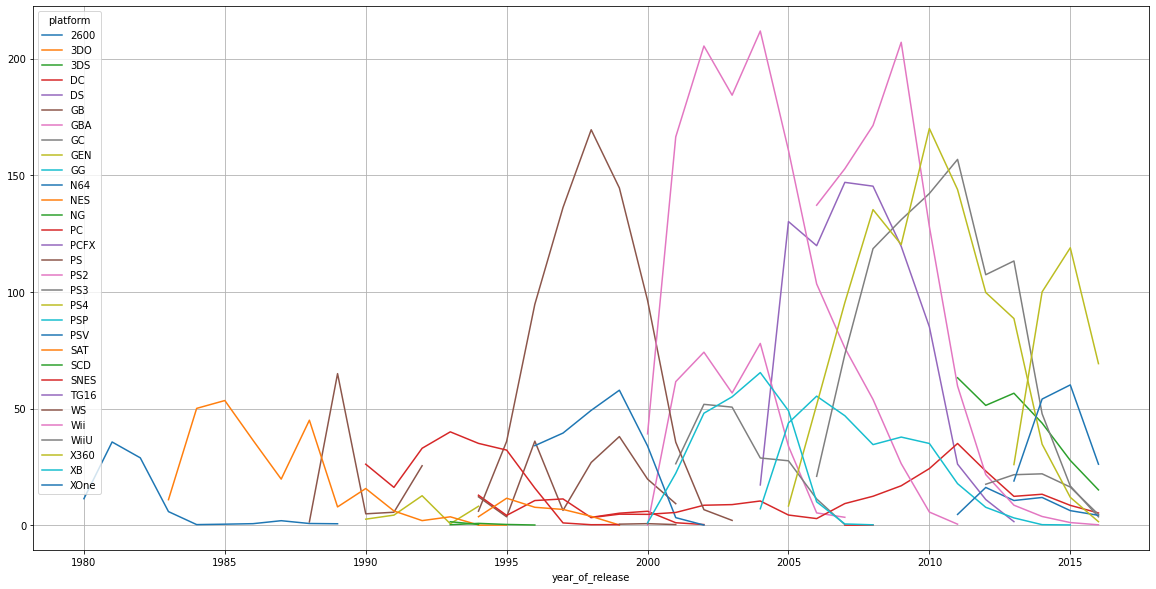

In [24]:
# построим график продаж всех платформ по всем годам
data_all.pivot_table(index='year_of_release', columns = 'platform', values='world_sales', aggfunc='sum')\
    .plot(grid=True, figsize=(20, 10));

До 1995 года новые платофрмы появлялись довольно редко, в среднем каждые 5 лет. Но и актуальными они оставались почти по 10 лет, так как конкурентов почти не было. После 1995 года платформы стали появляться чаще и с 2000 года каждый год выпускали что-то новое. Непопулярные конкуренты оставались на рынке около 5 лет, а крупные платформы держались на плаву десятилетиями, выпуская к устареванию своих моделей их обновленные варианты (X360->XOne, PS2->PS3-PS4). 

### Перейдём к актуальному для исследования периоду

Основная задача данных — помочь построить прогноз на 2017 год. Для этого не нужно знать историю развития индустрии компьютерных игр. Важно лишь понять тенденции последних лет. Поэтому исходя из расположенных выше графиков, можно определить самый актуальный для нас период: 2015-2016 годы.   

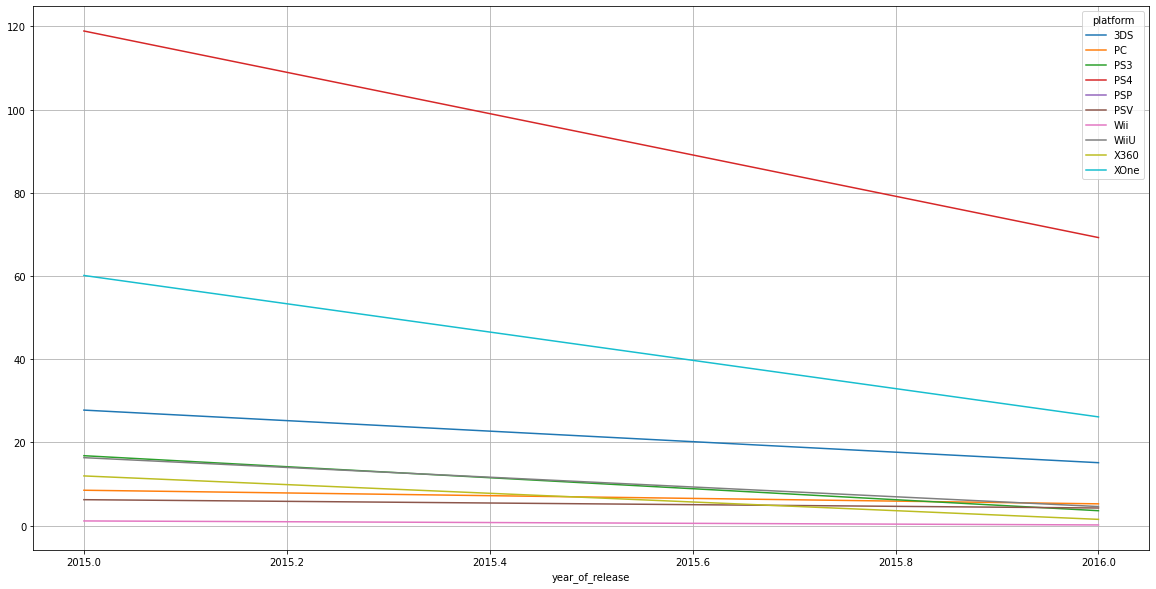

In [25]:
# сделаем срез датасета data_all
data = data_all.query('year_of_release >= 2015')
# отобразим этот период на графике
data.pivot_table(index='year_of_release', columns = 'platform', values='world_sales', aggfunc='sum')\
    .plot(grid=True, figsize=(20, 10));

#### Какие платформы лидируют по продажам, растут или падают? 
Лидеры продаж: PS4, XOne, 3DS. За данный период продажи упали у всех, даже у самых популярных платформ. Потенциально прибыльными будем считать тех, у кого в 2016 году продано больше 20 млн. копий (это PS4 и XOne).

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [26]:
data.groupby('platform')['world_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,132.0,0.325152,0.798620,0.01,0.030,0.090,0.2325,7.14
PC,104.0,0.132404,0.209449,0.01,0.020,0.050,0.1425,1.28
PS3,111.0,0.183964,0.342696,0.01,0.020,0.060,0.1600,2.70
PS4,301.0,0.625083,1.457063,0.01,0.050,0.120,0.4200,14.63
PSP,3.0,0.040000,0.034641,0.02,0.020,0.020,0.0500,0.08
PSV,195.0,0.053846,0.063669,0.01,0.020,0.030,0.0600,0.41
Wii,5.0,0.264000,0.390487,0.01,0.030,0.150,0.1800,0.95
WiiU,42.0,0.498810,0.850240,0.01,0.050,0.215,0.5175,4.44
X360,48.0,0.280833,0.381207,0.01,0.040,0.110,0.3525,1.70


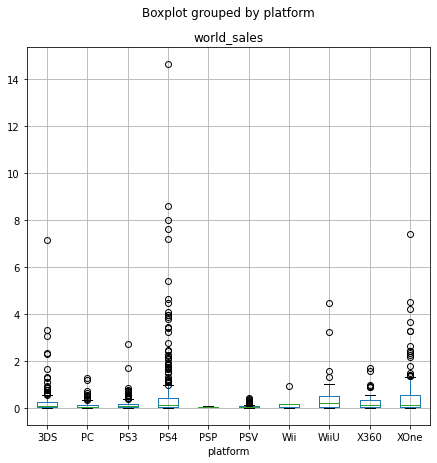

In [27]:
data.boxplot(column='world_sales', by='platform', grid=True, figsize=(7,7));

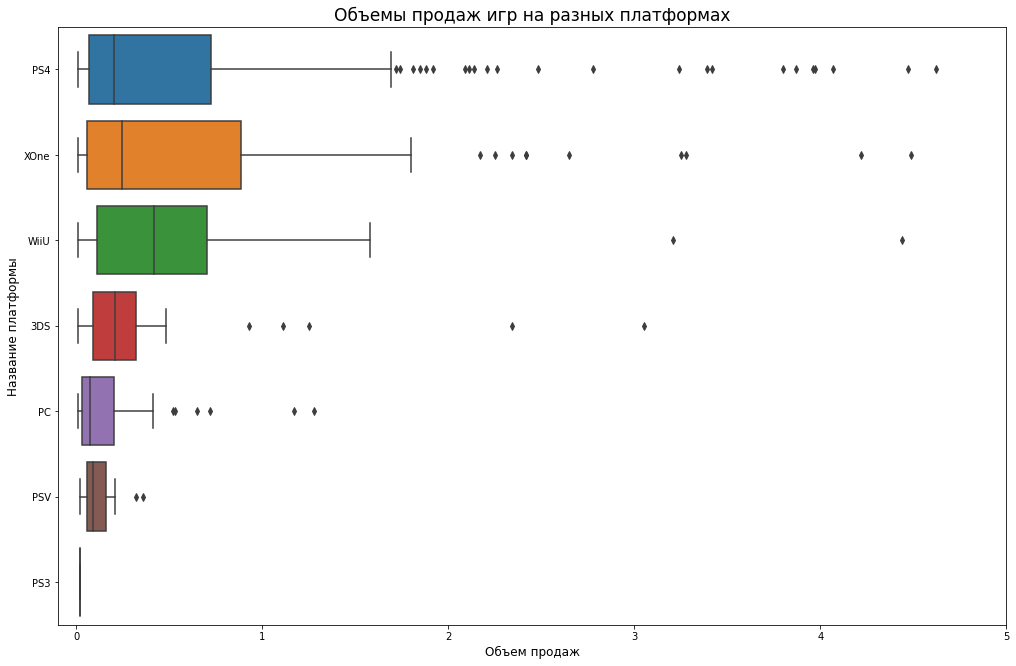

In [61]:
# код ревьюера

import seaborn as sns

plt.figure(figsize=(17, 11))
sns.boxplot(data=data, y='platform', x='world_sales')
plt.xlim(-0.1, 5)

plt.title('Объемы продаж игр на разных платформах', size=17)
plt.xlabel('Объем продаж', size=12)
plt.ylabel('Название платформы', size=12)

plt.show()

Диаграмма размаха для платформ показывает, что у 3DS, PS4 и XOne присутствует много выбросов. Это вполне логично можно объяснить "супер успешными" играми.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Для проверки возьмём платформу PS4.

In [28]:
# уберём из рассмотрения данные с пропущенными полями critic и user score
data = data.query('user_score != -1 and critic_score != -1')

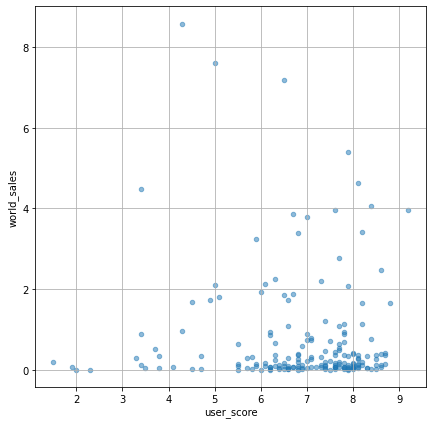

In [29]:
# построим диаграмму рассеяния для пользовательских оценок
data[data['platform']=='PS4'].plot(x='user_score', y='world_sales', kind='scatter', grid=True, figsize=(7,7), alpha=0.5);

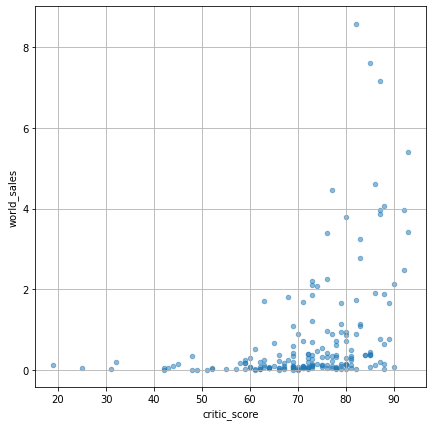

In [30]:
# построим диаграмму рассеяния для оценок критиков
data[data['platform']=='PS4'].plot(x='critic_score', y='world_sales', kind='scatter', grid=True, figsize=(7,7), alpha=0.5);

Теперь посчитаем корреляцию между отзывами и продажами.

In [31]:
data_ps4 = data[data['platform']=='PS4']

# пользователи
corr_user_ps4 = data_ps4['user_score'].corr(data_ps4['world_sales'])
print('Коэфф. корреляции пользовательских оценок:', corr_user_ps4)

# критики
corr_critic_ps4 = data_ps4['critic_score'].corr(data_ps4['world_sales'])
print('Коэфф. корреляции оценок критиков:', corr_critic_ps4)

Коэфф. корреляции пользовательских оценок: -0.06436843081030288
Коэфф. корреляции оценок критиков: 0.3920741369660568


##### Вывод
По диаграммам рассеяния для PS4 видно, что большая часть отзывов положительная (6-8 и 60-80), однако среди пользователей гораздо больше усредненных значений (4-6). Корреляция для пользовательских оценок - слабо отрицательная или даже нулевая (-0.06), а для оценок критиков - слабо положительная (0.39). 

### Соотнесём выводы с продажами игр на других платформах

Для платформ XOne, 3DS и PC построим диаграммы рассеяния по user_score и critic_score, а также посчитаем коэффициенты корреляции между ними и продажами отдельной платформы. Затем сравним результаты с выводами для платформы PS4.

#### XOne

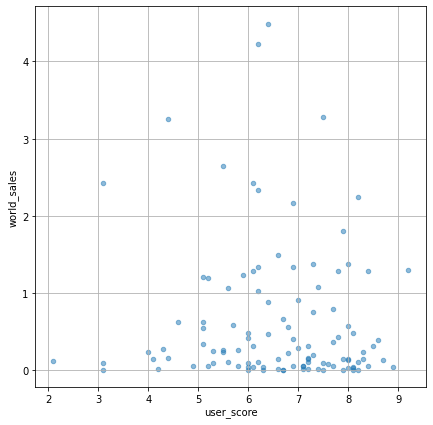

In [32]:
# построим диаграмму рассеяния для пользовательских оценок
data[data['platform']=='XOne'].plot(x='user_score', y='world_sales', kind='scatter', grid=True, figsize=(7,7), alpha=0.5);

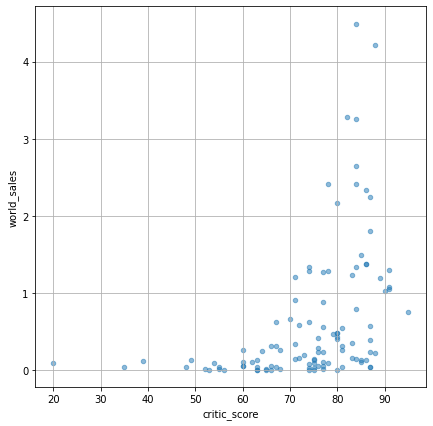

In [33]:
# построим диаграмму рассеяния для оценок критиков
data[data['platform']=='XOne'].plot(x='critic_score', y='world_sales', kind='scatter', grid=True, figsize=(7,7), alpha=0.5);

In [34]:
data_xone = data[data['platform']=='XOne']

# пользователи
corr_user_xone = data_xone['user_score'].corr(data_xone['world_sales'])
print('Коэфф. корреляции пользовательских оценок:', corr_user_xone)

# критики
corr_critic_xone = data_xone['critic_score'].corr(data_xone['world_sales'])
print('Коэфф. корреляции оценок критиков:', corr_critic_xone)

Коэфф. корреляции пользовательских оценок: -0.06868389218473443
Коэфф. корреляции оценок критиков: 0.4225192624742895


#### 3DS

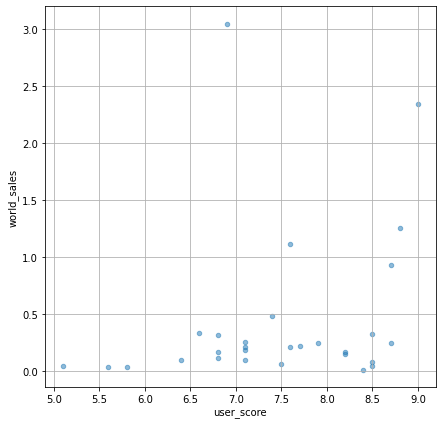

In [35]:
# построим диаграмму рассеяния для пользовательских оценок
data[data['platform']=='3DS'].plot(x='user_score', y='world_sales', kind='scatter', grid=True, figsize=(7,7), alpha=0.5);

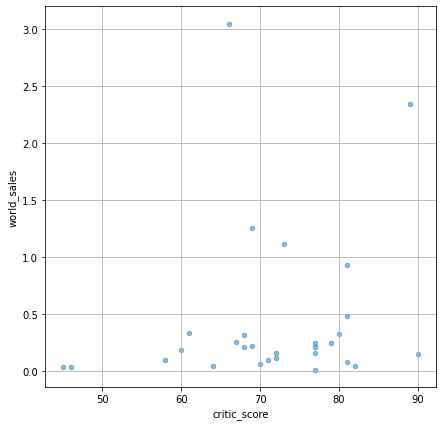

In [36]:
# построим диаграмму рассеяния для оценок критиков
data[data['platform']=='3DS'].plot(x='critic_score', y='world_sales', kind='scatter', grid=True, figsize=(7,7), alpha=0.5);

In [37]:
data_3ds = data[data['platform']=='3DS']

# пользователи
corr_user_3ds = data_3ds['user_score'].corr(data_3ds['world_sales'])
print('Коэфф. корреляции пользовательских оценок:', corr_user_3ds)

# критики
corr_critic_3ds = data_3ds['critic_score'].corr(data_3ds['world_sales'])
print('Коэфф. корреляции оценок критиков:', corr_critic_3ds)

Коэфф. корреляции пользовательских оценок: 0.24047698587957067
Коэфф. корреляции оценок критиков: 0.17757455046092874


#### PC

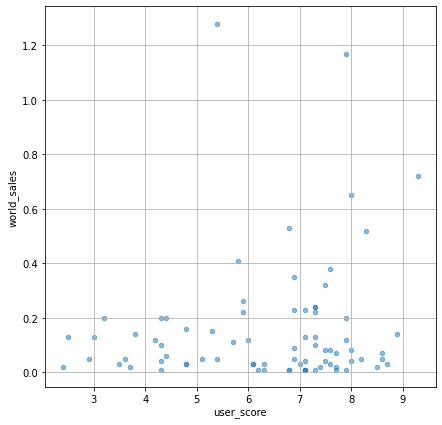

In [38]:
# построим диаграмму рассеяния для пользовательских оценок
data[data['platform']=='PC'].plot(x='user_score', y='world_sales', kind='scatter', grid=True, figsize=(7,7), alpha=0.5);

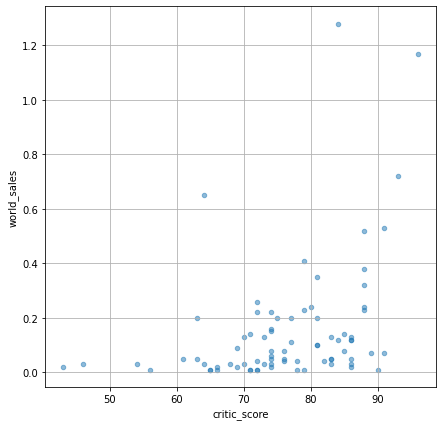

In [39]:
# построим диаграмму рассеяния для оценок критиков
data[data['platform']=='PC'].plot(x='critic_score', y='world_sales', kind='scatter', grid=True, figsize=(7,7), alpha=0.5);

In [40]:
data_pc = data[data['platform']=='PC']

# пользователи
corr_user_pc = data_pc['user_score'].corr(data_pc['world_sales'])
print('Коэфф. корреляции пользовательских оценок:', corr_user_pc)

# критики
corr_critic_pc = data_pc['critic_score'].corr(data_pc['world_sales'])
print('Коэфф. корреляции оценок критиков:', corr_critic_pc)

Коэфф. корреляции пользовательских оценок: 0.14031210542891726
Коэфф. корреляции оценок критиков: 0.3773317477241351


#### Вывод
Отзывы критиков по всем платформам имеют похожие распределения. Однако у PS4 и XOne большая часть значений находятся в диапазоне 70-90, а у 3DS и PC они равно мерно разбросаны от 60 до 80. С пользовательскими оценками всё иначе. У PS4, 3DS и XOne они преимущественно находятся на уровне 5.5-8.5, а любители PC отличаются особой придирчивостью, поэтому низких отзывов на этой платформе столько же, сколько и больших.
Коэффициенты корреляции для PS4, PC и XOne примерно равны 0 и 0.4 (user и critic_score соответственно), а у 3DS они наоброт составляют 0.24 для user_score и 0.17 для critic_score.


### Распределение игр по жанрам

#### Количественное распределение

In [41]:
data.pivot_table(index='genre', values='name', aggfunc='count')['name'].sort_values(ascending=False)

genre
action          147
shooter          56
sports           51
role-playing     50
adventure        28
racing           25
fighting         20
misc             19
platform         18
strategy         16
simulation       15
puzzle            3
Name: name, dtype: int64

Наибольшее кол-во игр: 
- `action` (147)
- `shooter` (56)

Наименьшее кол-во игр:
- `puzzle` (3)
- `simulation` (15)

#### Прибыльность жанров

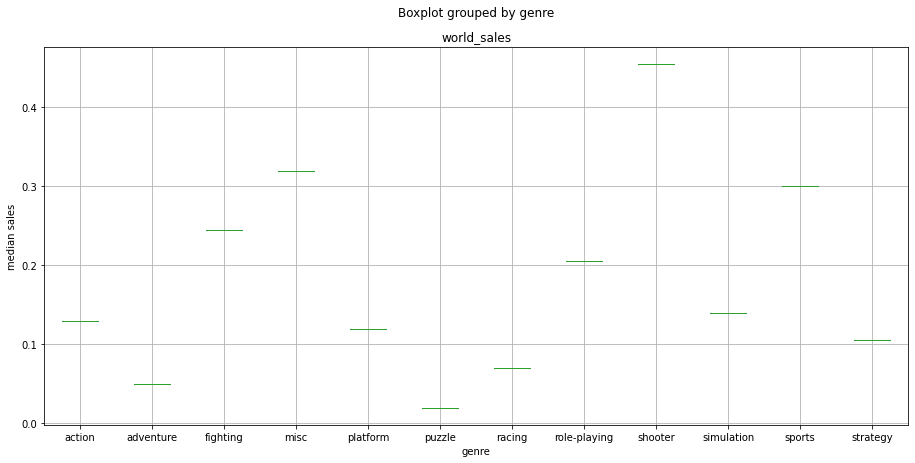

In [42]:
# рассмотрим медианные значения 
data.pivot_table(index='genre', values='world_sales', aggfunc='median')\
    .boxplot(grid=True, by='genre', figsize=(15, 7));
plt.xlabel('genre')
plt.ylabel('median sales')
plt.show()

Топ-5 популярных жанров:
- `shooter`
- `misc` 
- `sports`
- `fighting`
- `role-playing`

Топ-5 непопулярных жанров:
- `puzzle`
- `adventure` 
- `racing`
- `strategy`
- `platform`

### Вывод


Мы провели исследовательский анализ данных, в ходе которого сделали следующее:
1. Определили сколько игр выпускалось в разные годы;
2. Изучили изменения продаж по платформам и установили их примерные сроки существования;
3. Выбрали актуальный для исследования период и нашли в нём самые популярные платформы, для одной из которых рассмотрели влияние отзывов на продажи;
4. Описали влияние отзывов на продажи на 3-х других платформах;
5. Оценили распределение игр по жанрам, а также нашли самые прибыльные и убыточные из них.

Перейдём к следующему этапу работы.

## Составим портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в этом регионе

### Регион North-America (NA)

#### Платформы

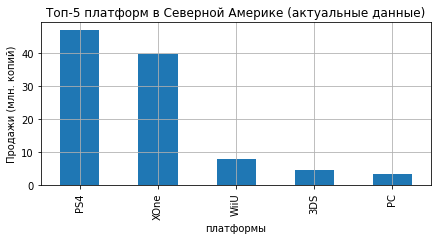

In [43]:
# сгруппируем актуальные данные по платформам 
platform_na_actual =  data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
# нарисуем гисттограмму
platform_na_actual.plot(kind='bar', grid=True, figsize=(7, 3), title='Топ-5 платформ в Северной Америке (актуальные данные)');

plt.xlabel('платформы')
plt.ylabel('Продажи (млн. копий)')

plt.show()

In [44]:
# доля продаж платформ по актуальной таблице
total = data['na_sales'].sum()
percentage_na = platform_na_actual / total * 100
print('Доля продаж топовых платформ в Северной Америке: \n', percentage_na)

Доля продаж топовых платформ в Северной Америке: 
 platform
PS4     45.568270
XOne    38.605508
WiiU     7.699767
3DS      4.422033
PC       3.355314
Name: na_sales, dtype: float64


#### Жанры

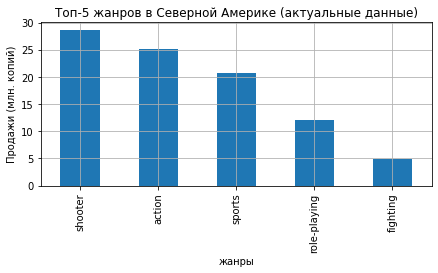

In [45]:
# сгруппируем актуальные данные по жанрам 
genre_na_actual =  data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
# нарисуем гисттограмму
genre_na_actual.plot(kind='bar', grid=True, figsize=(7, 3), title='Топ-5 жанров в Северной Америке (актуальные данные)');

plt.xlabel('жанры')
plt.ylabel('Продажи (млн. копий)')

plt.show()

In [46]:
# доля продаж жанров по актуальной таблице
total = data['na_sales'].sum()
percentage_na = genre_na_actual / total * 100
print('Доля продаж топовых жанров в Северной Америке: \n', percentage_na)

Доля продаж топовых жанров в Северной Америке: 
 genre
shooter         27.724981
action          24.301784
sports          20.073701
role-playing    11.714507
fighting         4.771140
Name: na_sales, dtype: float64


#### Рейтинг ESRB

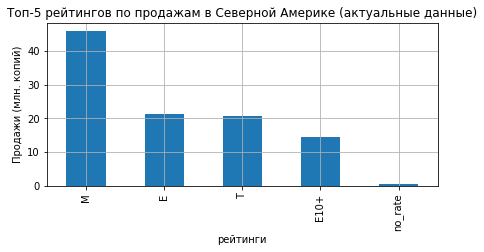

In [47]:
# сгруппируем актуальные данные по рейтингам 
rating_na =  data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head()
# нарисуем гисттограмму
rating_na.plot(kind='bar', grid=True, figsize=(7, 3), 
               title='Топ-5 рейтингов по продажам в Северной Америке (актуальные данные)');
plt.xlabel('рейтинги')
plt.ylabel('Продажи (млн. копий)')

plt.show()

Итак, в Северной Америке:
- наиболее популярная платформа - PS4;
- наиболее популярный жанр - 'shooter';
- наиболее прибыльный рейтинг - 'M'.

### Регион Europe (EU)

#### Платформы

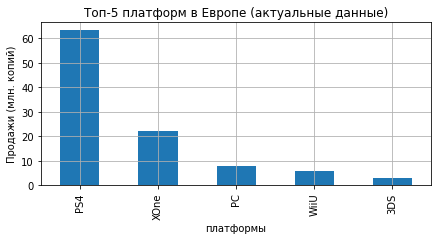

In [48]:
# сгруппируем актуальные данные по платформам 
platform_eu_actual =  data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
# нарисуем гисттограмму
platform_eu_actual.plot(kind='bar', grid=True, figsize=(7, 3), title='Топ-5 платформ в Европе (актуальные данные)');

plt.xlabel('платформы')
plt.ylabel('Продажи (млн. копий)')

plt.show()

In [49]:
# доля продаж платформ по актуальной таблице
total = data['eu_sales'].sum()
percentage_eu = platform_eu_actual / total * 100
print('Доля продаж топовых платформ в Европе: \n', percentage_eu)

Доля продаж топовых платформ в Европе: 
 platform
PS4     61.859694
XOne    21.680164
PC       7.561713
WiiU     5.542004
3DS      2.897844
Name: eu_sales, dtype: float64


#### Жанры

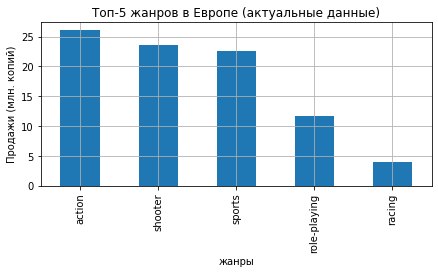

In [50]:
# сгруппируем актуальные данные по жанрам 
genre_eu_actual =  data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
# нарисуем гисттограмму
genre_eu_actual.plot(kind='bar', grid=True, figsize=(7, 3), title='Топ-5 жанров в Европе (актуальные данные)');

plt.xlabel('жанры')
plt.ylabel('Продажи (млн. копий)')

plt.show()

In [51]:
# доля продаж жанров по актуальной таблице
total = data['eu_sales'].sum()
percentage_eu = genre_eu_actual / total * 100
print('Доля продаж топовых жанров в Европе: \n', percentage_eu)

Доля продаж топовых жанров в Европе: 
 genre
action          25.456142
shooter         23.114450
sports          21.982632
role-playing    11.405991
racing           3.863792
Name: eu_sales, dtype: float64


#### Рейтинг ESRB

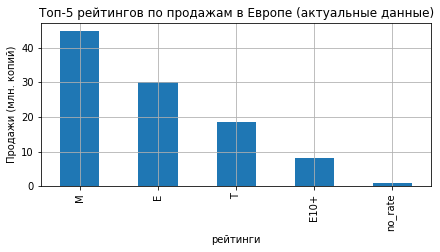

In [52]:
# сгруппируем актуальные данные по жанрам 
rating_eu =  data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head()
# нарисуем гисттограмму
rating_eu.plot(kind='bar', grid=True, figsize=(7, 3), 
               title='Топ-5 рейтингов по продажам в Европе (актуальные данные)');
plt.xlabel('рейтинги')
plt.ylabel('Продажи (млн. копий)')

plt.show()

Итак, в Европе:
- наиболее популярная платформа - PS4;
- наиболее популярный жанр - 'action';
- наиболее прибыльный рейтинг - 'M'.

### Регион Japan (JP)

#### Платформы

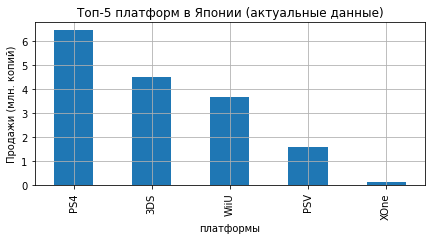

In [53]:
# сгруппируем актуальные данные по платформам 
platform_jp_actual =  data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
# нарисуем гисттограмму
platform_jp_actual.plot(kind='bar', grid=True, figsize=(7, 3), title='Топ-5 платформ в Японии (актуальные данные)');

plt.xlabel('платформы')
plt.ylabel('Продажи (млн. копий)')

plt.show()

In [54]:
# доля продаж платформ по актуальной таблице
total = data['jp_sales'].sum()
percentage_jp = platform_jp_actual / total * 100
print('Доля продаж топовых платформ в Японии: \n', percentage_jp)

Доля продаж топовых платформ в Японии: 
 platform
PS4     39.436620
3DS     27.434170
WiiU    22.473974
PSV      9.797918
XOne     0.857318
Name: jp_sales, dtype: float64


#### Жанры

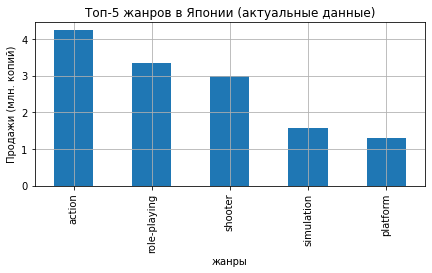

In [55]:
# сгруппируем актуальные данные по жанрам 
genre_jp_actual =  data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
# нарисуем гисттограмму
genre_jp_actual.plot(kind='bar', grid=True, figsize=(7, 3), title='Топ-5 жанров в Японии (актуальные данные)');

plt.xlabel('жанры')
plt.ylabel('Продажи (млн. копий)')

plt.show()

In [56]:
# доля продаж жанров по актуальной таблице
total = data['jp_sales'].sum()
percentage_jp = genre_jp_actual / total * 100
print('Доля продаж топовых жанров в Японии: \n', percentage_jp)

Доля продаж топовых жанров в Японии: 
 genre
action          25.964483
role-playing    20.453154
shooter         18.371096
simulation       9.552970
platform         7.899571
Name: jp_sales, dtype: float64


#### Рейтинг ESRB

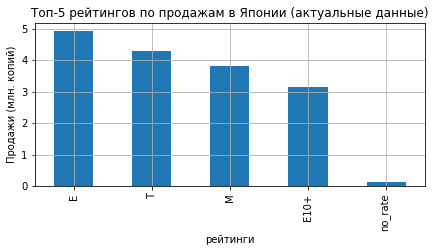

In [57]:
# сгруппируем актуальные данные по жанрам 
rating_jp =  data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head()
# нарисуем гисттограмму
rating_jp.plot(kind='bar', grid=True, figsize=(7, 3), 
               title='Топ-5 рейтингов по продажам в Японии (актуальные данные)');
plt.xlabel('рейтинги')
plt.ylabel('Продажи (млн. копий)')

plt.show()

Итак, в Японии:
- наиболее популярная платформа - PS4;
- наиболее популярный жанр - 'action';
- наиболее прибыльный рейтинг - 'E'.

### Вывод
Для пользователя каждого региона (NA, EU, JP) мы определили самые популярные платформы и жанры, а также проверили влияет ли рейтинг ESBR на продажи. 
Результаты получились следующие:

`По платформам`:
- в Северной Америке - PS4 (45.5%)
- в Европе - PS4 (61.8%)
- в Японии - PS4 (39.4%)

`По жанрам`:
- в Северной Америке - shooter (27.7%)
- в Европе - action (25.5%)
- в Японии - action (26%)

`По рейтингу ESRB`:
Во всех регионах, кроме Японии преимущественно покупали игры с взрослым возрастным рейтингом. **Следовательно, он влияет на продажи.** А в стране восходящего солнца лучше продаются игры категории E (для всех). Затем идут подростки (T) и взрослые (M).
- в Северной Америке - M
- в Европе - M
- в Японии - E

Теперь перейдём к заключительному этапу.

## Проверка гипотез

### Гипотеза №1
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- `H0: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые`;
- `H1: cредние пользовательские рейтинги платформ Xbox One и PC разные`.

In [58]:
# возьмём актуальный датасет
hypo1_data = data[data['user_score'] != -1]

# выборки
XOne = hypo1_data[hypo1_data['platform'] == 'XOne']['user_score']
PC = hypo1_data[hypo1_data['platform'] == 'PC']['user_score']

alpha = .05 # уровень статистической значимости


# используем метод для проверки гипотезы о равенстве 
# среднего двух генеральных совокупностей по взятым из них выборкам
results = st.ttest_ind(XOne, PC) # дисперсия в данном случае не повлияет на результат

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-value: 0.3280257221394691
Не получилось отвергнуть нулевую гипотезу


Следовательно, нулевая гипотеза остаётся, так как **нет достаточных оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC не одинаковые**. 



### Гипотеза №2
Средние пользовательские рейтинги жанров action и sports разные.
- `H0: средние пользовательские рейтинги жанров action и sports одинаковые`;
- `H1: средние пользовательские рейтинги жанров action и sports разные`.

In [59]:
# возьмём актуальный датасет, но уберём из него заглушки для рейтинга
hypo2_data = data[data['user_score'] != -1]
# выборки
action = hypo2_data[hypo2_data['genre'] == 'action']['user_score']
sports = hypo2_data[hypo2_data['genre'] == 'sports']['user_score']

alpha = .05 # уровень статистической значимости


# используем метод для проверки гипотезы о равенстве 
# среднего двух генеральных совокупностей по взятым из них выборкам
results = st.ttest_ind(action, sports) # дисперсия в данном случае не повлияет на результат

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-value: 3.5087325539494814e-07
Отвергаем нулевую гипотезу


Следовательно, мы отвергаем нулевую гипотезу. Cредние пользовательские рейтинги жанров action и sports разные! 

**Гипотеза верна.**

### Вывод
Мы проверили две гипотезы: о равенстве 'user_score' для XOne и PC, а также о различии 'user_score' для жанров action и sports. Пороговое значение alpha для обоих случаев было равно 0.05; I нулевую гипотезу мы сформулировали также, как она и была указана в задании, а II поменяли наоборот, так как изначально мы проверяем равенство средних двух ген. совокупностей по выборкам. Метод st.ttest_ind() был выбран исходя из того, что выборки независимы. 

По итогу II нулевая гипотеза была отвергнута, а значит средние 'user_score' для **action** и **sports** - разные.

## Общий вывод
В самом начале перед нами стояла задача ознакомиться с датасетом и устранить все его недочёты (неправильные регистры, типы данных или пропуски). Таким образом мы сделали следующее:
- привели названия столбцов к правильному виду;
- привели 2 параметра к нужным типам, разобравшись с пропущенными и аномальными значениями;
- выделили в отдельные категории пропуски в оценках игр

В ходе анализа мы рассмотрели очень много различных параметров и выявили следующие вещи:
1. Рынок компьютерных игр набрал обороты только к 1995 году, поэтому устаревшие данные можно смело отбрасывать;
2. По графику изменений продаж по платформам можно легко увидеть закономерности их появления и угасания, а также выделить самые прибыльные из них;
3. Период **с 2015 по 2016 год** является самым показательным для предсказания тенденций 2017 года;
4. В эти два года самыми популярными плафтормами были **PS4 и XOne**, так как они вышли в 2013 году и начали вытеснять устаревшие модели;
5. Отзывы пользователей и критиков слабо влияют на продажи игр для платформы PS4, но бОльшая часть из них всё равно положительные (8/10 или 80/100);
6. Для других платформ (3DS, XOne, PC) выводы о PS4 остаются актуальными, но пользовательские оценки игр на PC гораздо более жёсткие;
7. Жанрами с самыми высокими медианными продажами являются **[shooter, misc, sports, fighting, role-playing]**, а **[puzzle, adventure, racing, strategy, platform]** - с самыми низкими медианными продажами;
8. По актуальным данным (2015-2016 годы) портреты пользователей регионов NA, EU и JP довольно похожы. ТОП платформа для всех - **PS4**. ТОП жанры - **shooter и action**. Также мы установили, что возрастной рейтинг влияет на продажи (**M** - самый прибыльный);
9. Проверка I гипотезы не дала оснований для её отвержения, а II показала, что средние пользовательские оценки для **[action, sports]** - разные.

**Рекомендация отделу маркетинга:** по результатам исследования рынка компьютерных игр за последние годы можно смело сказать, что рекламную компанию на 2017 год следует сосредоточить на платформах PS4 и XOne, так как они являются лидерами продаж за 2015-2016 годы. Также нужно обратить внимание на жанры shooter и action, потому что они являются самыми популярными в портретах пользователей, и игры рейтинга M, их продажи были максимальными.   